# Checklist
##### 1) Part 0- Complete
##### 2) Part 1- Incomplete
##### 3) Part 2- Incomplete
##### 4) Part 3- Incomplete
##### 5) Part 4- Incomplete

# Part 0- Critical thinking


### Problem Statement:
##### How many people would buy the premium face mask which is scientifically proven to be better than N95 of around 1000.rs in India? Explain how did you conclude this answer and what was your approach towards this question in brief

---

Total population of India is 1.3 billion with total of 28 states and 8 Union territories. Considering that only few states and UT have to compulsary wear masks, the number of people wearing masks outside their home is quite less. The average cost of a normal mask is 10.rs which is significantly less than the cost of premium mask. Hence most of the population in rural area will prefer to/ afford to buy normal mask instead of premium. Rural population and Urban population has a split of approx 70:30 ratio i.e 900 million rural population and 500 million urban population.  
Therefore, the main number of focus here is 500 million i.e 17 million average population per state/UT. If 8 states/UT have mask compulsion then we have potential customer population of 17*8= 136 million. Out of remaining 365 million people, 60% are not interested in wearing a mask due to reason like work from home, no illness/symptoms of flu or covid, feel uncomfortable and difficult to breathe in a mask, travelling in a private car, etc. Therefore, only 140 million potential customers remain make a total of 140+136= approx 280 million of potential customers.  

Now average earning per month in Urban areas is around 25000.rs and approx 40% people fall below this category, leaving us with 170 million people. Again considering that 30% people are high earners and prefer to buy premium mask and only half of 70% moderate earners wish to buy premium mask we have total number of people that would buy a premium mask to be:  
(170x30%)+((170x70%)/2) = 51+60 = 111 million people.

# Part 1- Descriptive Analysis

## 1.1 Import Data And Required Packages

#### Import pandas, numpy, matplotlib, seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Read given excel data that is uploaded in sample data folder.

(NOTE: please add the data in the sample data folder for your runtime or change path to navigate to your data)

In [2]:
df = pd.read_excel('/content/sample_data/assignment.xlsx')

#### Show top 5 records of data

In [3]:
df.head()

,Year,Month,Segment,Region,KPI,Value Type,Value
0,2020,12,Clients,India,Lv1_Visitors,Actuals,3665558
1,2020,12,Clients,India,Lv2_Visitors,Actuals,2689569
2,2020,12,Clients,India,Lv3_Visitors,Actuals,1300571
3,2020,12,Clients,India,Lv4_Visitors,Actuals,717608
4,2020,12,Clients,India,Lv3_Visitors,Actuals,706677


#### Shape of dataset

In [4]:
df.shape

(1572, 7)

## 1.2 Dataset Information

*   Year : Year -> (2020/2021/2022)
*   Month : Month of the year -> (value between 1-12 inclusive of both ends)
*   Segment : End user category -> (Clients/Customers)
*   Region : which Region the record belongs to-> ('India', 'Uddepy', 'Dehradun', 'Ujjain', 'Indore', 'Faridabad','Aurangabad')
*   KPI : Performance indicator/feature -> ('Lv1_Visitors', 'Lv2_Visitors', 'Lv3_Visitors', 'Lv4_Visitors', 'Lv5_Visitors')
*   Value Type
*   Value




### 1.2.1 What type of company this dataset belongs to?

Looking at the "Segment", "KPI" and "Region" columns, it is evident that the dataset belong to an e-commerce company that operates in India. The keyword "visitors" in KPI shows that it is an engagement with a website. Additionally, the dataset has a time frame between year 2020 and 2022. As per data, "Clients" numeric value is more than "Customers" so it could also be a wholesale seller like **"Indiamart"** or similar.

### 1.2.2 Suppose that this dataset is for a website like Flipkart, what could be the possible definitions of the columns Level(visitors) 1, 2, 3, 4 and 5 in the given dataset? Do you observe any pattern?

On expanding the KPI to individual features, we obtain columns L1_visitor, L2_visitor, L3_visitor, L4_visitor, L5_visitor. Furthermore, a pattern can be observed such that sum of value decreases as we move one level up i.e L1_visitor has the highest sum of value whereas L5_visitor has the lowest sum of value. As per the pattern, it can be assumed that the possible definations of these indicators could be the **" *category of the visitor* "** as per their engagement behaviour and the value indicate the **" *total number of visitors per month* "** by that visitor category. 

The categories could be:  

1.   **The Browser**: Browsing and looking for products they dont actually want and least likely to buy.
2.   **The Price Hunter**: Looking for the products they actually want and checking for best deal accross various websites.
3.   **The repeat visitor**: Aware of your website and products and somewhat likely to buy in near future.
4.   **The Buyer**: The actual people that businesses are looking for. They are most likely to buy some product from your website.
5.   **The repeat buyer**: They trust your website and brand and keep buying stuff frequently.



## 1.3) Data Checks to perform

* Check Missing values
* Check Duplicates
* Check data type
* Check the number of unique values of each column
* Check statistics of data set
* Check various categories present in the different categorical column

### 1.3.1 Check Missing values

In [5]:
df.isna().sum()

Year          0
Month         0
Segment       0
Region        0
KPI           0
Value Type    0
Value         0
dtype: int64

There are no missing values in the data set

### 1.3.2 Check Duplicates



In [6]:
df.duplicated().sum()

0

There are no duplicate values in the data set

### 1.3.3 Check Data Types



In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1572 entries, 0 to 1571
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        1572 non-null   int64 
 1   Month       1572 non-null   int64 
 2   Segment     1572 non-null   object
 3   Region      1572 non-null   object
 4   KPI         1572 non-null   object
 5   Value Type  1572 non-null   object
 6   Value       1572 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 86.1+ KB


### 1.3.4 Check number of unique values in each column



In [8]:
df.nunique()

Year             3
Month           12
Segment          2
Region           7
KPI              5
Value Type       1
Value         1558
dtype: int64

### 1.3.5 Check Statistics of Dataset



In [9]:
## Scaling the value column for understanding purposes and clear display 
# Dividing value column by 100000

SCALING_FACTOR = 100000

df["Value"] = df["Value"].apply(lambda x: x/SCALING_FACTOR)
df.describe()

,Year,Month,Value
count,1572.000000,1572.000000,1572.000000
mean,2021.129771,6.500000,2.964329
std,0.832781,3.453151,11.303644
min,2020.000000,1.000000,0.001370
25%,2020.000000,3.750000,0.092477
50%,2021.000000,6.500000,0.325745
75%,2022.000000,9.250000,1.796810
max,2022.000000,12.000000,369.868990


Insights:

* From above description of numerical data, the data has a time frame between 2020 and 2022 for all the 12 months.
* The std deviation of the values column is very high with minimum value of 0.0013 to maximum value of 369.869.

## 1.4) Pivot view summary and visualizations

### 1.4.1 What was the total number of visitors segmented by each level, every month in each year?

Segregate data for each year into different dataframes

In [10]:
df_2020 = df[df["Year"]==2020] # 2020 dataframe
df_2021 = df[df["Year"]==2021] # 2021 dataframe
df_2022 = df[df["Year"]==2022] # 2022 dataframe

Create pivot table for each year into different dataframes segregratting into individual KPI

In [11]:
pivot_2020 = df_2020.pivot_table(values=["Value"], index=["Month"], columns=["KPI"], aggfunc=np.sum)["Value"]
pivot_2021 = df_2021.pivot_table(values=["Value"], index=["Month"], columns=["KPI"], aggfunc=np.sum)["Value"]
pivot_2022 = df_2022.pivot_table(values=["Value"], index=["Month"], columns=["KPI"], aggfunc=np.sum)["Value"]

# Removing the column and index name for styling and avoiding confusion (optional)
# pivot_2020.columns.name, pivot_2020.index.name = None, None
# pivot_2021.columns.name, pivot_2021.index.name = None, None
# pivot_2022.columns.name, pivot_2022.index.name = None, None

# Adding month-wise total column to dataframes
pivot_2020["Month-wise Total"] = pivot_2020["Lv1_Visitors"]+pivot_2020["Lv2_Visitors"]+pivot_2020["Lv3_Visitors"]+pivot_2020["Lv4_Visitors"]+pivot_2020["Lv5_Visitors"]
pivot_2021["Month-wise Total"] = pivot_2021["Lv1_Visitors"]+pivot_2021["Lv2_Visitors"]+pivot_2021["Lv3_Visitors"]+pivot_2021["Lv4_Visitors"]+pivot_2021["Lv5_Visitors"]
pivot_2022["Month-wise Total"] = pivot_2022["Lv1_Visitors"]+pivot_2022["Lv2_Visitors"]+pivot_2022["Lv3_Visitors"]+pivot_2022["Lv4_Visitors"]+pivot_2022["Lv5_Visitors"]

# Adding level-wise total row to dataframes
pivot_2020.loc["Level-wise Total"] = [np.sum(pivot_2020["Lv1_Visitors"]), np.sum(pivot_2020["Lv2_Visitors"]), np.sum(pivot_2020["Lv3_Visitors"]), np.sum(pivot_2020["Lv4_Visitors"]), np.sum(pivot_2020["Lv5_Visitors"]), np.sum(pivot_2020["Month-wise Total"])]
pivot_2021.loc["Level-wise Total"] = [np.sum(pivot_2021["Lv1_Visitors"]), np.sum(pivot_2021["Lv2_Visitors"]), np.sum(pivot_2021["Lv3_Visitors"]), np.sum(pivot_2021["Lv4_Visitors"]), np.sum(pivot_2021["Lv5_Visitors"]), np.sum(pivot_2021["Month-wise Total"])]
pivot_2022.loc["Level-wise Total"] = [np.sum(pivot_2022["Lv1_Visitors"]), np.sum(pivot_2022["Lv2_Visitors"]), np.sum(pivot_2022["Lv3_Visitors"]), np.sum(pivot_2022["Lv4_Visitors"]), np.sum(pivot_2022["Lv5_Visitors"]), np.sum(pivot_2022["Month-wise Total"])]

Pivot view summary for the year 2020

In [12]:
pivot_2020

KPI,Lv1_Visitors,Lv2_Visitors,Lv3_Visitors,Lv4_Visitors,Lv5_Visitors,Month-wise Total
Month,,,,,,
1,39.28041,27.65271,29.65989,13.92282,4.32501,114.84084
2,36.11176,25.10550,27.11901,12.72036,3.88833,104.94496
3,41.53670,28.83993,31.37029,14.90653,4.63865,121.29210
4,55.35973,39.10298,41.97245,21.47745,6.63513,164.54774
5,56.60716,41.18410,43.67712,388.47029,6.53319,536.47186
6,49.30513,35.32115,35.14933,15.62415,5.19698,140.59674
7,43.87748,31.13380,29.98704,12.77021,4.22305,121.99158
8,38.50727,27.01970,25.35076,10.61372,3.41384,104.90529
9,41.59677,29.27064,27.82353,12.06931,3.97399,114.73424


Pivot view summary for the year 2021

In [13]:
pivot_2021

KPI,Lv1_Visitors,Lv2_Visitors,Lv3_Visitors,Lv4_Visitors,Lv5_Visitors,Month-wise Total
Month,,,,,,
1,45.99499,34.27053,28.08389,12.65810,4.31654,125.32405
2,39.78160,28.52656,24.11639,10.81451,3.69060,106.92966
3,40.85245,28.03308,24.88462,11.36561,3.85526,108.99102
4,38.94486,26.23508,22.67941,10.13203,3.27495,101.26633
5,40.60154,27.34743,23.76839,10.51066,3.42566,105.65368
6,35.12596,23.36733,20.66367,8.82378,2.67300,90.65374
7,35.83579,24.37691,20.95257,9.61647,2.97286,93.75460
8,38.94788,25.63196,21.61006,9.84493,3.00599,99.04082
9,36.52692,23.95509,20.50716,8.96033,2.91774,92.86724


Pivot view summary for the year 2022

In [14]:
pivot_2022

KPI,Lv1_Visitors,Lv2_Visitors,Lv3_Visitors,Lv4_Visitors,Lv5_Visitors,Month-wise Total
Month,,,,,,
1,57.86931,36.12449,29.50453,13.47785,4.91002,141.88620
2,52.09831,32.18617,26.12804,12.06400,4.45489,126.93141
3,54.92505,33.67104,26.42382,10.75375,3.92981,129.70347
4,50.09326,30.23011,23.81095,10.62976,3.97493,118.73901
5,52.76813,33.19900,23.22455,9.93175,3.66967,122.79310
6,52.70040,33.31258,24.00946,10.03187,3.61343,123.66774
7,54.43284,34.56191,24.28696,10.99051,3.86571,128.13793
8,52.36514,32.87205,24.31317,10.09072,3.64445,123.28553
9,51.11320,32.01777,25.63464,9.96363,3.49600,122.22524


Insights:  

---

* The total visitors for the year 2020 is **191,638,498**
* The total visitors for the year 2021 is **122,563,947**
* The total visitors for the year 2022 is **151,790,010**

---

*  Visitiors for 3 years:  
                    2020        2021        2022  
        Level 1    544.79      479.18      635.95 
        Level 2    387.42      319.06      398.83
        Level 3    384.6       270.51      305.83
        Level 4    542.95      120.97      131.94
        Level 5    56.59       39.89       45.28  

* Level 4 has inconsistent value for the year 2020 which can possibly be an outlier






### 1.4.2 What is the percentage difference in the number of visitors between different regions and years?

In [99]:
pivot_by_region = df.pivot_table(values=["Value"], index=["Year"], columns=["Region"], aggfunc=np.sum)["Value"]
pivot_by_region.sort_values(by=2022 ,axis=1, inplace=True)
pivot_by_region.fillna(value=0, inplace=True)
pivot_by_region

Region,Aurangabad,Faridabad,Indore,Ujjain,Dehradun,Uddepy,India
Year,,,,,,,
2020,2.85497,11.70281,0.00000,11.76987,11.72070,43.76357,1834.57306
2021,3.00058,11.39358,0.00000,9.20026,9.30998,31.30906,1161.42601
2022,1.96448,9.21404,35.43866,57.43265,82.12445,223.07017,1108.65565


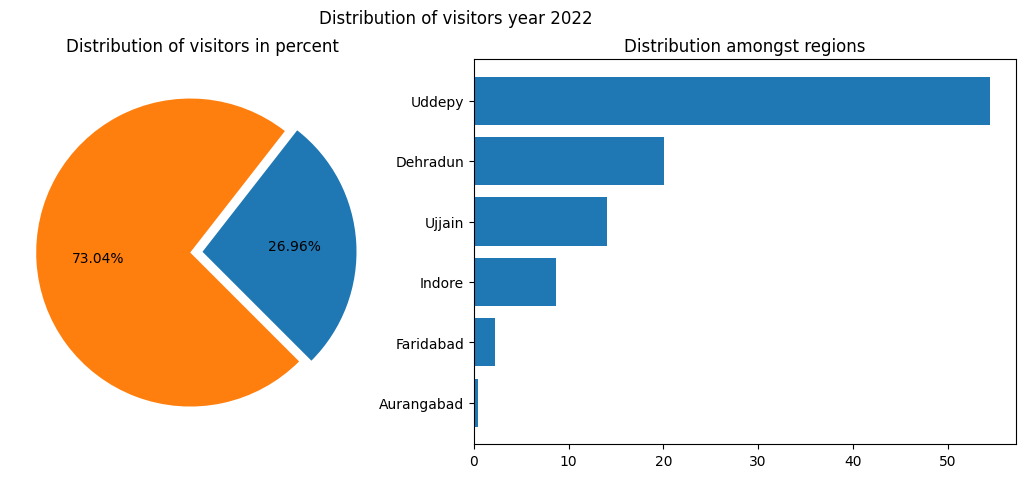

In [104]:
# make figure and assign axis objects
fig = plt.figure(figsize=(14, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
fig.subplots_adjust(wspace=0)
fig.suptitle("Distribution of visitors year 2022")

# large pie chart parameters
pie_chart=(pivot_by_region.iloc[2,:-1].sum(), pivot_by_region.iloc[2,-1])

ax1.pie(pie_chart, autopct='%1.2f%%', startangle=-45, explode=(0,0.08))

# small bar chart parameters
bar_chart= pivot_by_region.iloc[2,:-1]
bar_chart_pct= 100*(bar_chart/bar_chart.sum())

ax2.barh(y=bar_chart.index, width=bar_chart_pct)

ax1.set_title('Distribution of visitors in percent')
ax2.set_title('Distribution amongst regions')

plt.show()